![image info](https://raw.githubusercontent.com/albahnsen/MIAD_ML_and_NLP/main/images/banner_1.png)

# Taller: Construcción e implementación de árboles de decisión y métodos de ensamblaje

En este taller podrá poner en práctica los sus conocimientos sobre construcción e implementación de árboles de decisión y métodos de ensamblajes. El taller está constituido por 9 puntos, 5 relacionados con árboles de decisión (parte A) y 4 con métodos de ensamblaje (parte B).

## Parte A - Árboles de decisión

En esta parte del taller se usará el conjunto de datos de Capital Bikeshare de Kaggle, donde cada observación representa el alquiler de bicicletas durante una hora y día determinado. Para más detalles puede visitar los siguientes enlaces: [datos](https://archive.ics.uci.edu/ml/machine-learning-databases/00275/Bike-Sharing-Dataset.zip), [dicccionario de datos](https://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset#).

### Datos prestamo de bicicletas

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Importación de librerías
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, export_graphviz

In [5]:
# Lectura de la información de archivo .csv
bikes = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/bikeshare.csv', index_col='datetime', parse_dates=True)

# Renombrar variable "count" a "total"
bikes.rename(columns={'count':'total'}, inplace=True)

# Crear la hora como una variable 
bikes['hour'] = bikes.index.hour

# Visualización de los datos
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


### Punto 1 - Análisis descriptivo

Ejecute las celdas 1.1 y 1.2. A partir de los resultados realice un análisis descriptivo sobre las variables "season" y "hour", escriba sus inferencias sobre los datos. Para complementar su análisis puede usar métricas como máximo, mínimo, percentiles entre otros.

In [6]:
# Celda 1.1
bikes.groupby('season').total.mean()

season
1    116.343261
2    215.251372
3    234.417124
4    198.988296
Name: total, dtype: float64

In [7]:
# Celda 1.2
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

# Análisis de la variable 'season'
season_counts = bikes['season'].value_counts().sort_index()
print(season_counts)

# Análisis de la variable 'hour'
hours_counts = bikes['hour'].value_counts().sort_index()
print(hours_counts)

season
1    2686
2    2733
3    2733
4    2734
Name: count, dtype: int64
hour
0     455
1     454
2     448
3     433
4     442
5     452
6     455
7     455
8     455
9     455
10    455
11    455
12    456
13    456
14    456
15    456
16    456
17    456
18    456
19    456
20    456
21    456
22    456
23    456
Name: count, dtype: int64


In [9]:
# Agurpo por 'season' y obtener estadísticas descriptivas del total de alquileres
season_stats = bikes.groupby('season')['total'].describe()

# Obtengo métricas específicas para un análisis más detallado
season_percentiles = bikes.groupby('season')['total'].quantile([0.25, 0.5, 0.75]).unstack()

# Imprimir los resultados
print("Estadísticas Descriptivas por Temporada:")
print(season_stats)
print("\nPercentiles (25%, 50%, 75%) de Alquileres por Temporada:")
print(season_percentiles)

# Agrupo por 'hour' y obtener estadísticas descriptivas del total de alquileres
hour_stats = bikes.groupby('hour')['total'].describe()

# Obtengo métricas específicas para un análisis más detallado
hour_percentiles = bikes.groupby('hour')['total'].quantile([0.25, 0.5, 0.75]).unstack()

# Imprimir los resultados
print("Estadísticas Descriptivas por Hora del Día:")
print(hour_stats)
print("\nPercentiles (25%, 50%, 75%) de Alquileres por Hora del Día:")
print(hour_percentiles)


Estadísticas Descriptivas por Temporada:
         count        mean         std  min   25%    50%    75%    max
season                                                                
1       2686.0  116.343261  125.273974  1.0  24.0   78.0  164.0  801.0
2       2733.0  215.251372  192.007843  1.0  49.0  172.0  321.0  873.0
3       2733.0  234.417124  197.151001  1.0  68.0  195.0  347.0  977.0
4       2734.0  198.988296  177.622409  1.0  51.0  161.0  294.0  948.0

Percentiles (25%, 50%, 75%) de Alquileres por Temporada:
        0.25   0.50   0.75
season                    
1       24.0   78.0  164.0
2       49.0  172.0  321.0
3       68.0  195.0  347.0
4       51.0  161.0  294.0
Estadísticas Descriptivas por Hora del Día:
      count        mean         std   min     25%    50%     75%    max
hour                                                                   
0     455.0   55.138462   43.620012   2.0   24.00   41.0   74.50  283.0
1     454.0   33.859031   34.112105   1.0   11.00   1

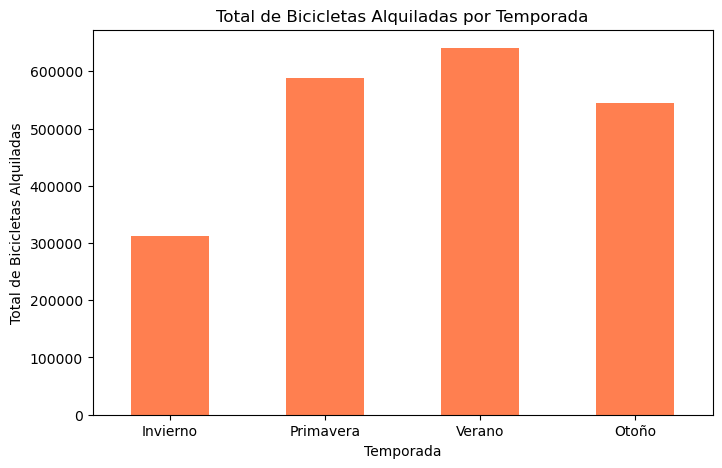

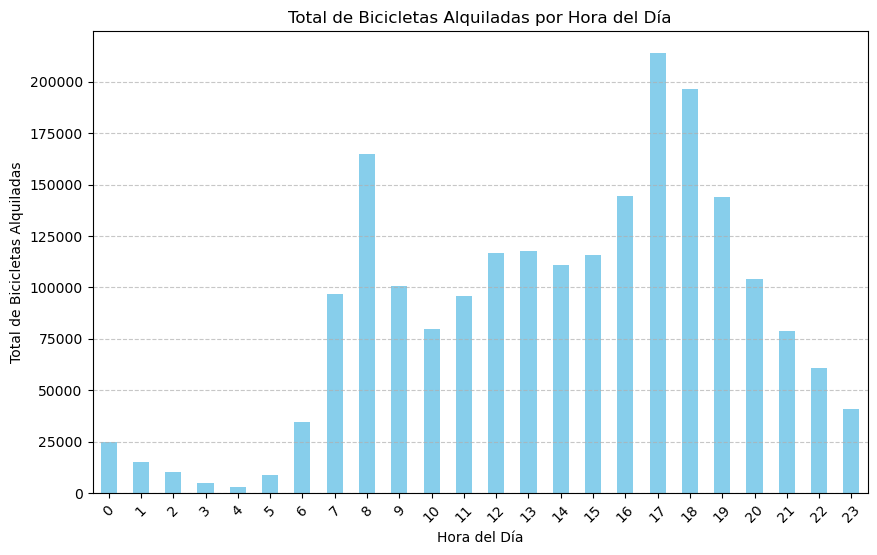

In [10]:
import matplotlib.pyplot as plt

# Suma total de bicicletas alquiladas por temporada
total_by_season = bikes.groupby('season')['total'].sum()

# Gráfico
plt.figure(figsize=(8, 5))
total_by_season.plot(kind='bar', color='coral')
plt.title('Total de Bicicletas Alquiladas por Temporada')
plt.xlabel('Temporada')
plt.ylabel('Total de Bicicletas Alquiladas')
plt.xticks(ticks=[0, 1, 2, 3], labels=['Invierno', 'Primavera', 'Verano', 'Otoño'], rotation=0)
plt.show()

# Suma total de bicicletas alquiladas por hora del día
total_by_hour = bikes.groupby('hour')['total'].sum()

# Gráfico2
plt.figure(figsize=(10, 6))
total_by_hour.plot(kind='bar', color='skyblue')
plt.title('Total de Bicicletas Alquiladas por Hora del Día')
plt.xlabel('Hora del Día')
plt.ylabel('Total de Bicicletas Alquiladas')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Analizando los datos del promedio de alquileres por temporada, podemos evidenciar que en el verano se presenta el mayor promedio de alquileres (234.42), seguido por la primavera (season 2) con un promedio de 215.25. Esto sugiere una preferencia por el uso de bicicletas en climas más cálidos. El invierno (season 1), con el promedio más bajo (116.34), indica una disminución significativa en el uso de bicicletas, posiblemente debido a condiciones climáticas más adversas.

Los percentiles reflejan una amplia distribución en la cantidad de alquileres, especialmente en verano y primavera, donde el 75% de los datos alcanzan hasta 347 y 321 alquileres, respectivamente. Esto indica días con alta demanda durante estas estaciones.

La desviación estándar alta en todas las estaciones sugiere una variabilidad considerable en el número de alquileres día a día, lo que podría estar influenciado por factores como el clima específico de cada día, eventos locales, y variaciones en la actividad turística.

EN cuanto a la variable hora, los datos muestran dos picos pronunciados durante el día, uno por la mañana a las 8 horas (362.77) y otro en la tarde a las 17 horas (468.77), lo cual es indicativo de los horarios de inicio y fin de la jornada laboral. Esto sugiere un uso intensivo del sistema de bicicletas para el commute al trabajo o la escuela.

Existe una marcada disminución en los alquileres durante la madrugada (de 0 a 5), con el mínimo alrededor de las 4am (6.41). Esto coincide con el comportamiento esperado de menor actividad en horas no laborales, esta disminucion del comportamiento comienza a partir de las 21 horas.

Se analizo la cantidad de registros por temporada y por hora y se puede observar que es bastante equilibrada, lo que indica que el conjunto de datos proporciona una buena representación de todas las estaciones del año y horas del día para el análisis.


### Punto 2 - Análisis de gráficos

Primero ejecute la celda 2.1 y asegúrese de comprender el código y el resultado. Luego, en cada una de celdas 2.2 y 2.3 escriba un código que genere una gráfica del número de bicicletas rentadas promedio para cada valor de la variable "hour" (hora) cuando la variable "season" es igual a 1 (invierno) e igual a 3 (verano), respectivamente. Analice y escriba sus hallazgos.

<Axes: xlabel='hour'>

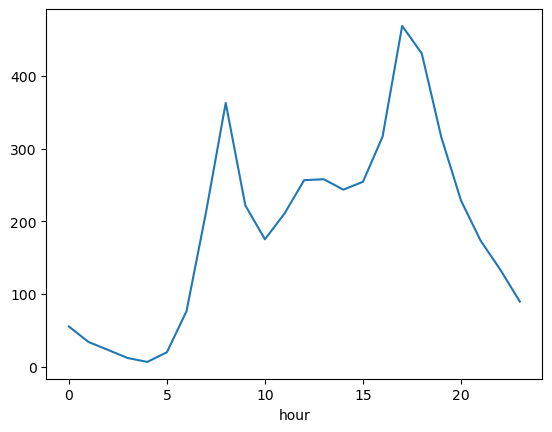

In [11]:
# Celda 2.1 - rentas promedio para cada valor de la variable "hour"
bikes.groupby('hour').total.mean().plot()

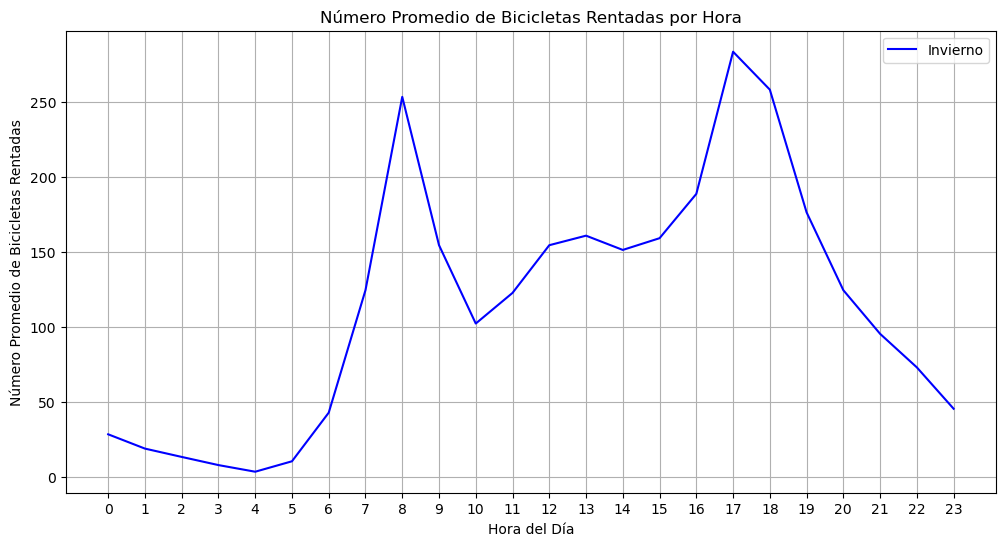

In [12]:
# Celda 2.2 - "season"=1 escriba su código y hallazgos 
bikes_winter = bikes[bikes['season'] == 1]

avg_rentals_winter = bikes_winter.groupby('hour')['total'].mean()

# Gráfica para invierno
plt.figure(figsize=(12, 6))
avg_rentals_winter.plot(color='blue', label='Invierno')

# leyendas y etiquetas
plt.title('Número Promedio de Bicicletas Rentadas por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

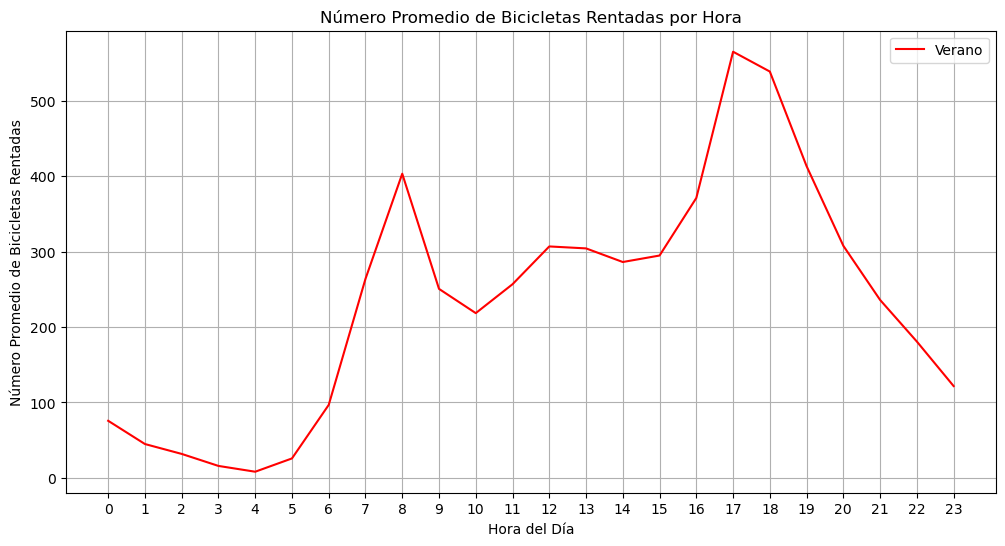

In [15]:
# Celda 2.3 - "season"=3 escriba su código y hallazgos 
bikes_summer = bikes[bikes['season'] == 3]

avg_rentals_summer = bikes_summer.groupby('hour')['total'].mean()

# Gráfica para Verano
plt.figure(figsize=(12, 6))
avg_rentals_summer.plot(color='red', label='Verano')

# leyendas y etiquetas
plt.title('Número Promedio de Bicicletas Rentadas por Hora')
plt.xlabel('Hora del Día')
plt.ylabel('Número Promedio de Bicicletas Rentadas')
plt.xticks(range(0, 24))
plt.legend()
plt.grid(True)
plt.show()

La similitud en los patrones de ambas estaciones refleja un comportamiento consistente de alquiler relacionado con las rutinas diarias de los usuarios, independientemente de la estación. Sin embargo, la marcada diferencia en el volumen total de alquileres refleja la influencia del clima y la temporada en la elección de la bicicleta como modo de transporte.

En invierno, la cantidad promedio de bicicletas rentadas es menor en comparación con el verano.Sin embargo, se observan picos similares durante las horas de tráfico de la mañana y la tarde, lo que sugiere que la bicicleta sigue siendo un medio de transporte utilizado para desplazamientos diarios, como ir al trabajo o la escuela, incluso durante el invierno.

Durante el verano, el número promedio de bicicletas rentadas aumenta significativamente, lo que indica una preferencia por actividades al aire libre y posiblemente una mayor afluencia de turistas o residentes que eligen andar en bicicleta debido al clima más favorable.


### Punto 3 - Regresión lineal
En la celda 3 ajuste un modelo de regresión lineal a todo el conjunto de datos, utilizando "total" como variable de respuesta y "season" y "hour" como las únicas variables predictoras, teniendo en cuenta que la variable "season" es categórica. Luego, imprima los coeficientes e interprételos. ¿Cuáles son las limitaciones de la regresión lineal en este caso?

In [51]:
# Celda 3
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,  mean_absolute_error, r2_score


# Convertir 'season' a variable categórica y obtener variables dummy
bikes['season'] = bikes['season'].astype('category')
season_dummies = pd.get_dummies(bikes['season'], drop_first=True) 
# se excluye una variable dummy (winter), y esa categoría se convierte en la categoría de referencia para evitar una relación lineal perfecta entre ellas.


# Predictores X y la variable de respuesta y
X = pd.concat([season_dummies, bikes['hour']], axis=1)
y = bikes['total']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)

model = LinearRegression()
model.fit(X_train, y_train)

intercepto = model.intercept_
coeficientes = model.coef_

# Imprime el intercepto y los coeficientes
print('Intercepto:', intercepto)
print('Coeficientes:', coeficientes)

# Evaluación del modelo con el conjunto de prueba
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)



Intercepto: -6.861344746500748
Coeficientes: [ 99.24935554 118.61364466  86.34787834  10.53927098]
MSE: 25931.64896491297
RMSE: 161.03306792368133
MAE: 119.73663393312302
R^2: 0.2195338224863329


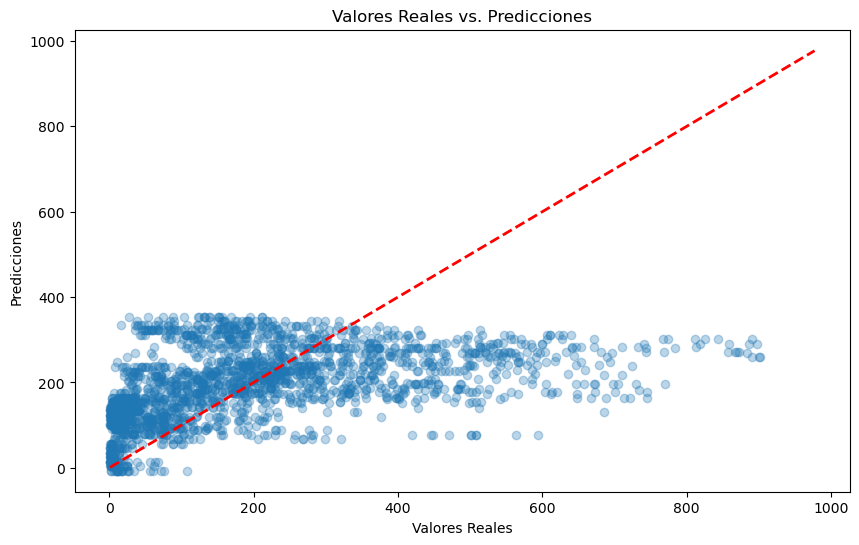

In [48]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()


Con los resultados obtenidos:

Total de Alquieres = -6.861344746500748 + 99.24935554xspring + 118.61364466xsummer + 86.34787834xfall + 10.53927098xhour

Se ha hecho la prediccion sin la variable winter ya que es la categoría de referencia para evitar relacion linal entre variables. 

Como resultado se obtiene que para calcular el total de alquileres por hora en cada temporada la ecuacion quedaria de esta manera:

Total de Alquieres winter = -6.861344746500748 + 10.53927098xhour
Total de Alquieres Spring = 92.38 + 10.53927098xhour
Total de Alquieres summer = 111.75 + 10.53927098xhour
Total de Alquieres = 79.49 + 10.53927098xhour

Sin embargo, en promedio, las predicciones de el modelo se desvían aproximadamente 161 bicicletas del valor real, indicando que el modelo no está prediciendo tan precisamente como se desearía.

El R^2
2
  indica que solo alrededor del 21.95% de la variabilidad en el total de bicicletas alquiladas es explicada por el modelo. Esto sugiere que el modelo, con las variables season y hour como predictoras, no captura la mayoría de los factores que afectan la cantidad de alquileres.]

### Punto 4 - Árbol de decisión manual
En la celda 4 cree un árbol de decisiones para pronosticar la variable "total" iterando **manualmente** sobre las variables "hour" y  "season". El árbol debe tener al menos 6 nodos finales.

In [111]:
# Convertir 'season' a variable categórica y obtener variables dummy
bikes['season'] = bikes['season'].astype('category')
season_dummies = pd.get_dummies(bikes['season']) 

for col in season_dummies:
    season_dummies[col] = season_dummies[col].astype(int)  # O .astype(float) si prefieres


# Predictores X y la variable de respuesta y
X = pd.concat([season_dummies, bikes['hour']], axis=1)
y = bikes['total']

# Divido los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

X_train.columns = X_train.columns.astype(str)
X_test.columns = X_test.columns.astype(str)


In [112]:
y_train

datetime
2011-09-03 12:00:00    257
2012-08-02 17:00:00    865
2012-04-12 06:00:00     96
2011-06-19 19:00:00    311
2012-02-03 04:00:00      2
                      ... 
2011-11-15 13:00:00    153
2011-08-05 22:00:00    188
2012-10-14 14:00:00    617
2012-12-16 09:00:00    132
2011-07-02 18:00:00    383
Name: total, Length: 8708, dtype: int64

In [123]:
# Celda 4
# Definición de parámetros y criterios de parada
max_depth = 7 # Aseguramos que sea minimo 6
num_pct = 10 # percentiles
max_features = None #todas las caracteristicas
min_gain=0.001 #ganancia
level= 0 #nivel actual

def gini(y):
    if y.shape[0] == 0:
        return 0
    else:
        return 1 - (y.mean()**2 + (1 - y.mean())**2)

def gini_impurity(X_col, y, split):
    
    filter_l = X_col < split
    y_l = y.loc[filter_l]
    y_r = y.loc[~filter_l]
    
    n_l = y_l.shape[0]
    n_r = y_r.shape[0]
    
    gini_y = gini(y)
    gini_l = gini(y_l)
    gini_r = gini(y_r)
    
    gini_impurity_ = gini_y - (n_l / (n_l + n_r) * gini_l + n_r / (n_l + n_r) * gini_r)
    
    return gini_impurity_

def best_split(X, y, num_pct):
    
    features = range(X.shape[1])
    
    best_split = [0, 0, 0]  # j, split, gain
    
    # Para todas las varibles 
    for j in features:
        
        splits = np.percentile(X.iloc[:, j], np.arange(0, 100, 100.0 / (num_pct+1)).tolist())
        splits = np.unique(splits)[1:]
        
        # Para cada partición
        for split in splits:
            gain = gini_impurity(X.iloc[:, j], y, split)
                        
            if gain > best_split[2]:
                best_split = [j, split, gain]
    
    return best_split

def tree_grow(X, y, level=0, min_gain=0.001, max_depth=None, num_pct=10):
    
    # Si solo es una observación
    if X.shape[0] == 1:
        tree = dict(y_pred=y.iloc[:1].values[0], level=level, split=-1, n_samples=1, gain=0)
        return tree
    
    # Calcular la mejor división
    j, split, gain = best_split(X, y, num_pct)
    
    # Guardar el árbol y estimar la predicción
    y_pred = y.mean()
    
    
    tree = dict(y_pred=y_pred, level=level, split=-1, n_samples=X.shape[0], gain=gain)
    # Revisar el criterio de parada 
    if gain < min_gain:
        return tree
    if max_depth is not None:
        if level >= max_depth:
            return tree   
    
    # Continuar creando la partición
    filter_l = X.iloc[:, j] < split
    X_l, y_l = X.loc[filter_l], y.loc[filter_l]
    X_r, y_r = X.loc[~filter_l], y.loc[~filter_l]
    tree['split'] = [j, split]

    # Siguiente iteración para cada partición
    
    tree['sl'] = tree_grow(X_l, y_l, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    tree['sr'] = tree_grow(X_r, y_r, level + 1, min_gain=min_gain, max_depth=max_depth, num_pct=num_pct)
    
    return tree




In [124]:
tree = tree_grow(X_train, y_train, level, min_gain, max_depth, num_pct)
tree

{'y_pred': 190.85553514010107,
 'level': 0,
 'split': [4, 8.0],
 'n_samples': 8708,
 'gain': 18225.48257905194,
 'sl': {'y_pred': 55.02396665508857,
  'level': 1,
  'split': [4, 7.0],
  'n_samples': 2879,
  'gain': 6976.900556961125,
  'sl': {'y_pred': 32.624950337703616,
   'level': 2,
   'split': [4, 6.0],
   'n_samples': 2517,
   'gain': 607.6218415621652,
   'sl': {'y_pred': 25.446561338289964,
    'level': 3,
    'split': [4, 2.0],
    'n_samples': 2152,
    'gain': 396.10111004989835,
    'sl': {'y_pred': 44.806451612903224,
     'level': 4,
     'split': [0, 1.0],
     'n_samples': 744,
     'gain': 300.4714846076149,
     'sl': {'y_pred': 51.908438061041295,
      'level': 5,
      'split': [4, 1.0],
      'n_samples': 557,
      'gain': 279.68637419095285,
      'sl': {'y_pred': 63.79783393501805,
       'level': 6,
       'split': [2, 1.0],
       'n_samples': 277,
       'gain': 107.5410964495004,
       'sl': {'y_pred': 58.5,
        'level': 7,
        'split': -1,
       

In [125]:
def tree_predict(X, tree, proba=False):
    
    predicted = np.ones(X.shape[0])

    # Revisar si es el nodo final
    if tree['split'] == -1:
        if not proba:
            predicted = predicted * tree['y_pred']
        else:
            predicted = predicted * tree['y_prob']
            
    else:
        
        j, split = tree['split']
        filter_l = (X.iloc[:, j] < split)
        X_l = X.loc[filter_l]
        X_r = X.loc[~filter_l]

        if X_l.shape[0] == 0:  # Si el nodo izquierdo está vacio solo continua con el derecho 
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)
        elif X_r.shape[0] == 0:  #  Si el nodo derecho está vacio solo continua con el izquierdo
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
        else:
            predicted[filter_l] = tree_predict(X_l, tree['sl'], proba)
            predicted[~filter_l] = tree_predict(X_r, tree['sr'], proba)

    return predicted

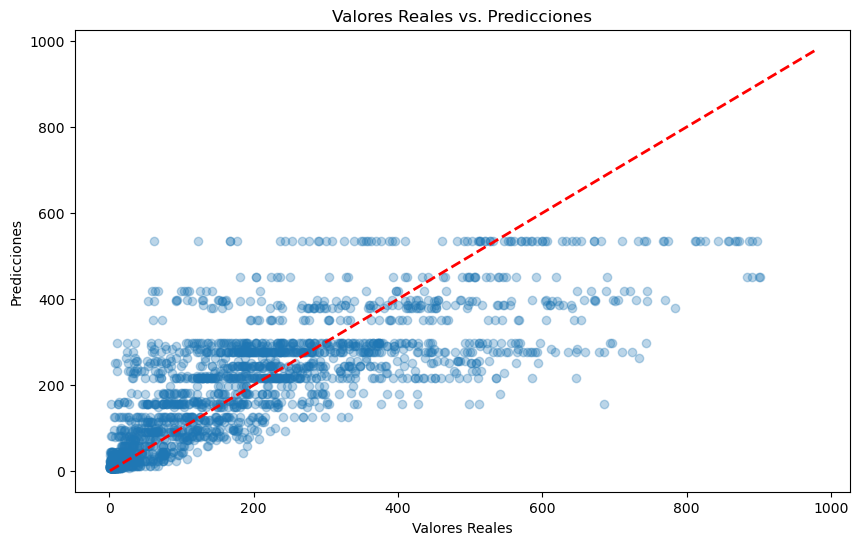

In [141]:
y_pred_manual = tree_predict(X_test, tree)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_manual, alpha=0.3)
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

### Punto 5 - Árbol de decisión con librería
En la celda 5 entrene un árbol de decisiones con la **librería sklearn**, usando las variables predictoras "season" y "hour" y calibre los parámetros que considere conveniente para obtener un mejor desempeño. Recuerde dividir los datos en conjuntos de entrenamiento y validación para esto. Comente el desempeño del modelo con alguna métrica de desempeño de modelos de regresión y compare desempeño con el modelo del punto 3.

In [139]:
# Celda 5
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Importación de modelos de sklearn 
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=30, scoring='accuracy').mean())

Text(0, 0.5, 'Accuracy')

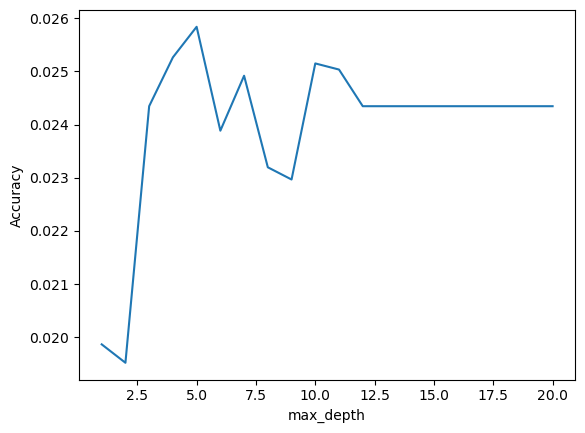

In [140]:
plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [143]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]
clf = DecisionTreeClassifier(max_depth=5, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, random_state=1)

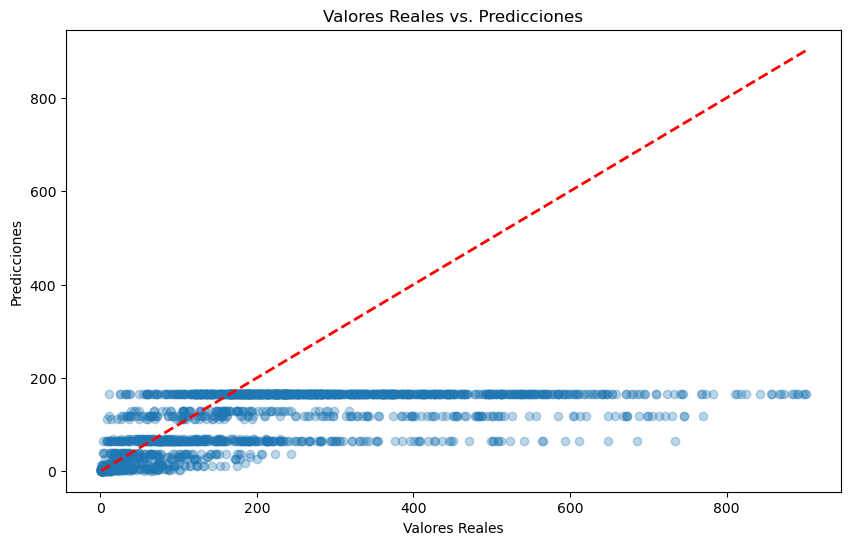

In [144]:
y_pred_sk = clf.predict(X_test)

plt.figure(figsize=(10, 6))
# Graficar los valores reales vs las predicciones
# Aquí, alpha controla la transparencia de los puntos
plt.scatter(y_test, y_pred_sk, alpha=0.3)
# Dibuja una línea roja que representa la perfección en la predicción
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', lw=2, color='red')
plt.xlabel('Valores Reales')
plt.ylabel('Predicciones')
plt.title('Valores Reales vs. Predicciones')
plt.show()

In [147]:
# Métricas para el modelo manual
mae_manual = mean_absolute_error(y_test, y_pred_manual)
mse_manual = mean_squared_error(y_test, y_pred_manual)
rmse_manual = np.sqrt(mse_manual)
r2_manual = r2_score(y_test, y_pred_manual)

# Métricas para el modelo con sklearn
mae_sklearn = mean_absolute_error(y_test, y_pred_sk)
mse_sklearn = mean_squared_error(y_test, y_pred_sk)
rmse_sklearn = np.sqrt(mse_sklearn)
r2_sklearn = r2_score(y_test, y_pred_sk)

print("Métricas del modelo manual:")
print(f"MAE: {mae_manual}, MSE: {mse_manual}, RMSE: {rmse_manual}, R^2: {r2_manual}")

print("\nMétricas del modelo con sklearn:")
print(f"MAE: {mae_sklearn}, MSE: {mse_sklearn}, RMSE: {rmse_sklearn}, R^2: {r2_sklearn}")

Métricas del modelo manual:
MAE: 78.02977817193073, MSE: 13397.522646952086, RMSE: 115.74766799790001, R^2: 0.5967740693016675

Métricas del modelo con sklearn:
MAE: 109.53535353535354, MSE: 31566.009182736456, RMSE: 177.66825597932922, R^2: 0.04995619215940139


El valor del Error absoluto medio menor en el modelo manula indica que en promedio, las predicciones están más cerca del valor real.
Ambas medidas del Error (MSE y RMSE) sugieren que grandes errores son menos frecuentes en comparación con el modelo de sklearn.
R^2 acercándose a 1 en el modelo manual, implica que las predicciones explican una mayor proporción de la variabilidad en los datos reales.

Estas métricas colectivamente sugieren que el modelo manual predice con mucha mayor precisión las cantidades de bicicletas alquiladas que el modelo generado por sklearn

## Parte B - Métodos de ensamblajes
En esta parte del taller se usará el conjunto de datos de Popularidad de Noticias Online. El objetivo es predecir si la notica es popular o no, la popularidad está dada por la cantidad de reacciones en redes sociales. Para más detalles puede visitar el siguiente enlace: [datos](https://archive.ics.uci.edu/ml/datasets/online+news+popularity).

### Datos popularidad de noticias

In [148]:
# Lectura de la información de archivo .csv
df = pd.read_csv('https://raw.githubusercontent.com/davidzarruk/MIAD_ML_NLP_2023/main/datasets/mashable.csv', index_col=0)
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,Popular
0,http://mashable.com/2014/12/10/cia-torture-rep...,28.0,9.0,188.0,0.732620,1.0,0.844262,5.0,1.0,1.0,...,0.200000,0.80,-0.487500,-0.60,-0.250000,0.9,0.8,0.4,0.8,1
1,http://mashable.com/2013/10/18/bitlock-kicksta...,447.0,7.0,297.0,0.653199,1.0,0.815789,9.0,4.0,1.0,...,0.160000,0.50,-0.135340,-0.40,-0.050000,0.1,-0.1,0.4,0.1,0
2,http://mashable.com/2013/07/24/google-glass-po...,533.0,11.0,181.0,0.660377,1.0,0.775701,4.0,3.0,1.0,...,0.136364,1.00,0.000000,0.00,0.000000,0.3,1.0,0.2,1.0,0
3,http://mashable.com/2013/11/21/these-are-the-m...,413.0,12.0,781.0,0.497409,1.0,0.677350,10.0,3.0,1.0,...,0.100000,1.00,-0.195701,-0.40,-0.071429,0.0,0.0,0.5,0.0,0
4,http://mashable.com/2014/02/11/parking-ticket-...,331.0,8.0,177.0,0.685714,1.0,0.830357,3.0,2.0,1.0,...,0.100000,0.55,-0.175000,-0.25,-0.100000,0.0,0.0,0.5,0.0,0


In [149]:
# Definición variable de interes y variables predictoras
X = df.drop(['url', 'Popular'], axis=1)
y = df['Popular']
y.mean()

0.5

In [150]:
# División de la muestra en set de entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

### Punto 6 - Árbol de decisión y regresión logística
En la celda 6 construya un árbol de decisión y una regresión logística. Para el árbol calibre al menos un parámetro y evalúe el desempeño de cada modelo usando las métricas de Accuracy y F1-Score.

Text(0, 0.5, 'Accuracy')

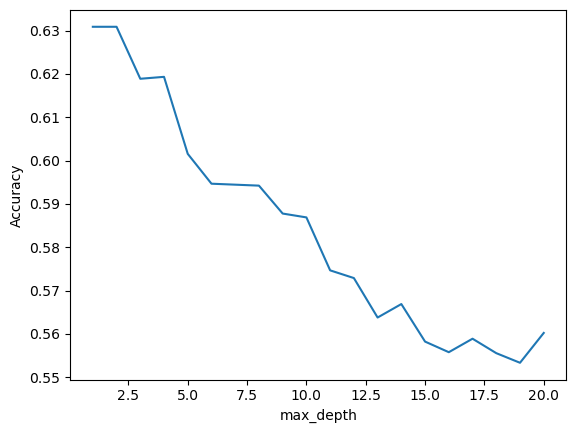

In [153]:
# Celda 6from sklearn.tree import DecisionTreeClassifier
max_depth_range = range(1, 21)

# Lista para guardar los valores del RMSE para cada valor de máxima profundidad (max_depth)
accuracy_scores = []

# Loop para obtener el desempeño del modelo de acuerdo con la máxima profundidad
for depth in max_depth_range:
    # Definición del árbol de decisión usando DecisionTreeClassifier de la libreria sklearn
    clf = DecisionTreeClassifier(max_depth=depth, random_state=1)
    accuracy_scores.append(cross_val_score(clf, X_train, y_train, cv=10, scoring='accuracy').mean())

plt.plot(max_depth_range, accuracy_scores)
plt.xlabel('max_depth')
plt.ylabel('Accuracy')

In [154]:
sorted(zip(accuracy_scores, max_depth_range))[::-1][0]

(0.6308888888888888, 2)

In [195]:
clf = DecisionTreeClassifier(max_depth=4, random_state=1)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=1)

In [196]:
y_pred_tree = clf.predict(X_test)

# Calculo métricas
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_score_tree = f1_score(y_test, y_pred_tree)

print("Accuracy del árbol de decisión:", accuracy_tree)
print("F1-Score del árbol de decisión:", f1_score_tree)

Accuracy del árbol de decisión: 0.6513333333333333
F1-Score del árbol de decisión: 0.6345213137665969


In [158]:
from sklearn.linear_model import LogisticRegression

# clasificador de regresión logística
log_reg = LogisticRegression(random_state=1)

# Entreno el modelo
log_reg.fit(X_train, y_train)

# Predicciones en el conjunto de prueba
y_pred_log_reg = log_reg.predict(X_test)

# Calculo métricas
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
f1_score_log_reg = f1_score(y_test, y_pred_log_reg)

print("Accuracy de la regresión logística:", accuracy_log_reg)
print("F1-Score de la regresión logística:", f1_score_log_reg)


Accuracy de la regresión logística: 0.6146666666666667
F1-Score de la regresión logística: 0.6110363391655451


Basándose en las métricas de evaluación, se concluye que el árbol de decisión, con una profundidad máxima de 2, emergió como el modelo con un desempeño superior en términos de Accuracy y F1-Score. Este modelo logró capturar de manera más efectiva la relación entre las características del conjunto de datos y la variable 'Popular', en contraste con el enfoque de la regresión logística.

### Punto 7 - Votación Mayoritaria
En la celda 7 elabore un esamble con la metodología de **Votación mayoritaria** compuesto por 300 muestras bagged para cada uno de los siguientes escenarios:

-100 árboles de decisión donde max_depth tome un valor de su elección\
-100 árboles de decisión donde min_samples_leaf tome un valor de su elección\
-100 regresiones logísticas

Evalúe cada uno de los tres modelos de manera independiente utilizando las métricas de Accuracy y F1-Score, luego evalúe el ensamble de modelos y compare los resultados. 

In [170]:
# Celda 7
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Árboles de decisión con max_depth definido
dt_max_depth = DecisionTreeClassifier(max_depth=5)
bagging_dt_max_depth = BaggingClassifier(base_estimator=dt_max_depth, n_estimators=100, bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
bagging_dt_max_depth.fit(X_train, y_train)

# Árboles de decisión con min_samples_leaf definido
dt_min_samples_leaf = DecisionTreeClassifier(min_samples_leaf=50)
bagging_dt_min_samples_leaf = BaggingClassifier(base_estimator=dt_min_samples_leaf, n_estimators=100,  bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
bagging_dt_min_samples_leaf.fit(X_train, y_train)

# Regresion logísticas
log_reg = LogisticRegression()
bagging_log_reg = BaggingClassifier(base_estimator=log_reg, n_estimators=100,  bootstrap=True,
                        random_state=42, n_jobs=-1, oob_score=True)
bagging_log_reg.fit(X_train, y_train)


# Predicciones con cada ensamble
preds_dt_max_depth = bagging_dt_max_depth.predict(X_test)
preds_dt_min_samples_leaf = bagging_dt_min_samples_leaf.predict(X_test)
preds_log_reg = bagging_log_reg.predict(X_test)

In [172]:
from sklearn import metrics

model_predictions = {
    "Árbol con max_depth": preds_dt_max_depth,
    "Árbol con min_samples_leaf": preds_dt_min_samples_leaf,
    "Regresión Logística": preds_log_reg
}

for model_name, predictions in model_predictions.items():
    f1 = metrics.f1_score(y_test, predictions)
    accuracy = metrics.accuracy_score(y_test, predictions)
    print(f"{model_name} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")

Árbol con max_depth - F1 Score: 0.6573, Accuracy: 0.6573
Árbol con min_samples_leaf - F1 Score: 0.6711, Accuracy: 0.6720
Regresión Logística - F1 Score: 0.6121, Accuracy: 0.6180


### Punto 8 - Votación Ponderada
En la celda 8 elabore un ensamble con la metodología de **Votación ponderada** compuesto por 300 muestras bagged para los mismos tres escenarios del punto 7. Evalúe los modelos utilizando las métricas de Accuracy y F1-Score

In [173]:
# Celda 8
def weighted_voting_with_oob(clf, X_train, y_train, X_test, y_test):
    # Calculando errores OOB y predicciones para cada modelo en el ensamble
    errors = np.zeros(clf.n_estimators)
    y_pred_all_ = np.zeros((X_test.shape[0], clf.n_estimators))
    
    for i in range(clf.n_estimators):
        oob_sample = ~clf.estimators_samples_[i]
        y_pred_ = clf.estimators_[i].predict(X_train.values[oob_sample])
        errors[i] = 1 - metrics.accuracy_score(y_pred_, y_train.values[oob_sample])
        y_pred_all_[:, i] = clf.estimators_[i].predict(X_test)
        
    # Calculando los pesos alpha de cada modelo basados en los errores OOB
    alpha = (1 - errors) / (1 - errors).sum()
    
    # Realizando votación ponderada
    y_pred_weighted = (np.sum(y_pred_all_ * alpha, axis=1) >= 0.5).astype(int)
    
    # Calculando y devolviendo las métricas
    f1 = metrics.f1_score(y_test, y_pred_weighted)
    accuracy = metrics.accuracy_score(y_test, y_pred_weighted)
    return f1, accuracy


In [174]:
# Lista de tus modelos de ensamble
ensemble_models = [
    ('DT con max_depth', bagging_dt_max_depth),
    ('DT con min_samples_leaf', bagging_dt_min_samples_leaf),
    ('Regresión Logística', bagging_log_reg)
]

# Votación ponderada y mostrar resultados de cada modelo
for name, model in ensemble_models:
    f1, accuracy = weighted_voting_with_oob(model, X_train, y_train, X_test, y_test)
    print(f"{name} - F1 Score: {f1:.4f}, Accuracy: {accuracy:.4f}")


DT con max_depth - F1 Score: 0.6514, Accuracy: 0.6560
DT con min_samples_leaf - F1 Score: 0.6689, Accuracy: 0.6693
Regresión Logística - F1 Score: 0.6108, Accuracy: 0.6160


### Punto 9 - Comparación y análisis de resultados
En la celda 9 comente sobre los resultados obtenidos con las metodologías usadas en los puntos 7 y 8, compare los resultados y enuncie posibles ventajas o desventajas de cada una de ellas.

- Para el arbol con max_depth (5), la votación mayoritaria supera ligeramente a la votación ponderada tanto en F1 Score (0.6573 vs. 0.6514) como en Accuracy (0.6573 vs. 0.6560).
  
- Para DT con min_samples_leaf(50), la votación mayoritaria también tiene un rendimiento ligeramente superior a la votación ponderada en ambas métricas (F1 Score de 0.6711 vs. 0.6689 y Accuracy de 0.6720 vs. 0.6693).
  
- Para la Regresión Logística, los resultados son muy cercanos entre ambos métodos, con una ligera ventaja para la votación mayoritaria.

En este caso específico, la votación mayoritaria parece ser ligeramente superior a la votación ponderada según las métricas de F1 Score y Accuracy. Esto podría sugerir que, para este conjunto de datos y configuraciones de modelo específicos, dar el mismo peso a cada voto de los clasificadores individuales en el ensamble es tan efectivo, o incluso marginalmente mejor, que ponderar estos votos por el rendimiento del clasificador.

Mejor Modelo: Según las métricas proporcionadas, el modelo de Árbol de Decisión con min_samples_leaf de 50, utilizando votación mayoritaria, muestra el mejor rendimiento con un F1 Score de 0.6711 y una Accuracy de 0.6720. Esto indica que este modelo tiene un buen equilibrio entre precisión y recall, y es el más preciso en general para clasificar correctamente las instancias en tu conjunto de datos.